### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

### 2. Dataset

In [2]:
import tensorflow_datasets as tfds

(ds_train, ds_validation), ds_info = tfds.load(
    'imagenette',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


2023-06-22 21:33:17.567919: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2023-06-22 21:33:17.567944: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-22 21:33:17.567948: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-22 21:33:17.568008: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-22 21:33:17.568043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


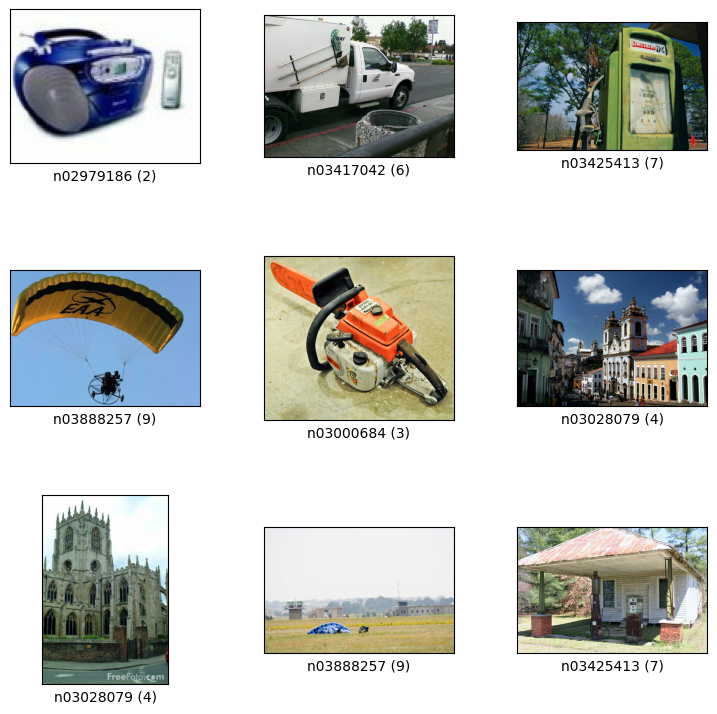

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
def normalize_img(image, label):
    image = tf.image.resize(image, (parameter.IMAGE_SIZE, parameter.IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(parameter.BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(parameter.BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)

### 3. Training

In [5]:
import tensorflow_datasets as tfds

import Models.VGG_16_PT
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

num_classes = 10

model = Models.VGG_16_PT.Model(num_classes)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [6]:
# [layer1, layer2, layer3] = model.layers
# W1, b1 = layer1.get_weights()
# W2, b2 = layer2.get_weights()
# W3, b3 = layer3.get_weights()
# print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
# print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
# print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

In [7]:
history = model.fit(
    ds_train,
    epochs=10,
    verbose=2,
)

Epoch 1/10


2023-06-22 21:33:18.824958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 - 9s - loss: 1.6665 - accuracy: 0.4377 - 9s/epoch - 61ms/step
Epoch 2/10
148/148 - 4s - loss: 1.1267 - accuracy: 0.6254 - 4s/epoch - 26ms/step
Epoch 3/10
148/148 - 4s - loss: 0.9738 - accuracy: 0.6807 - 4s/epoch - 27ms/step
Epoch 4/10
148/148 - 4s - loss: 0.8819 - accuracy: 0.7110 - 4s/epoch - 27ms/step
Epoch 5/10
148/148 - 4s - loss: 0.8332 - accuracy: 0.7209 - 4s/epoch - 26ms/step
Epoch 6/10
148/148 - 4s - loss: 0.7886 - accuracy: 0.7424 - 4s/epoch - 28ms/step
Epoch 7/10
148/148 - 4s - loss: 0.7535 - accuracy: 0.7497 - 4s/epoch - 28ms/step
Epoch 8/10
148/148 - 4s - loss: 0.7197 - accuracy: 0.7646 - 4s/epoch - 27ms/step
Epoch 9/10
148/148 - 4s - loss: 0.6896 - accuracy: 0.7745 - 4s/epoch - 27ms/step
Epoch 10/10
148/148 - 4s - loss: 0.6621 - accuracy: 0.7869 - 4s/epoch - 27ms/step


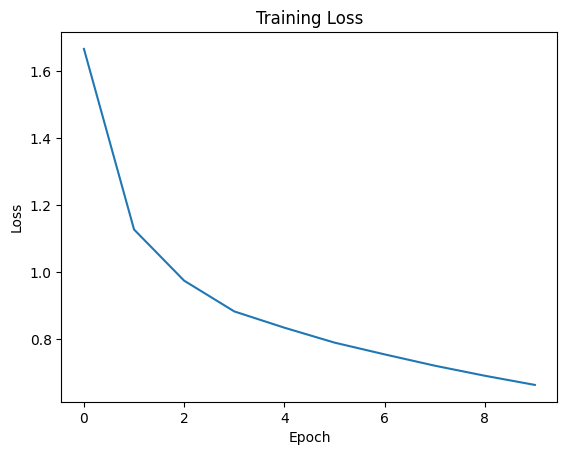

In [8]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 4. Test

In [9]:
model.evaluate(ds_validation)

 1/62 [..............................] - ETA: 16s - loss: 0.8343 - accuracy: 0.7812

2023-06-22 21:34:03.819317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 2s 34ms/step - loss: 0.7960 - accuracy: 0.7450


[0.7959667444229126, 0.7449681758880615]